In [2]:
# IMPORT LIBRARIES AND LOAD DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\Sanskruti Diyewar\OneDrive\Desktop\Project Data Analyis\Data.csv')
data

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [3]:
# DESCRIPTIVE STATISTICS
# Basic statistics
data.describe()

# Data types and missing values
data.info()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7011 entries, 0 to 7010
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7011 non-null   object 
 1   gender            7011 non-null   int64  
 2   SeniorCitizen     7011 non-null   int64  
 3   Partner           7011 non-null   int64  
 4   Dependents        7011 non-null   int64  
 5   Tenure            7011 non-null   int64  
 6   PhoneService      7011 non-null   int64  
 7   MultipleLines     7011 non-null   int64  
 8   InternetService   7011 non-null   int64  
 9   OnlineSecurity    7011 non-null   int64  
 10  OnlineBackup      7011 non-null   int64  
 11  DeviceProtection  7011 non-null   int64  
 12  TechSupport       7011 non-null   int64  
 13  StreamingTV       7011 non-null   int64  
 14  StreamingMovies   7011 non-null   int64  
 15  Contract          7011 non-null   int64  
 16  PaperlessBilling  7011 non-null   int64  


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

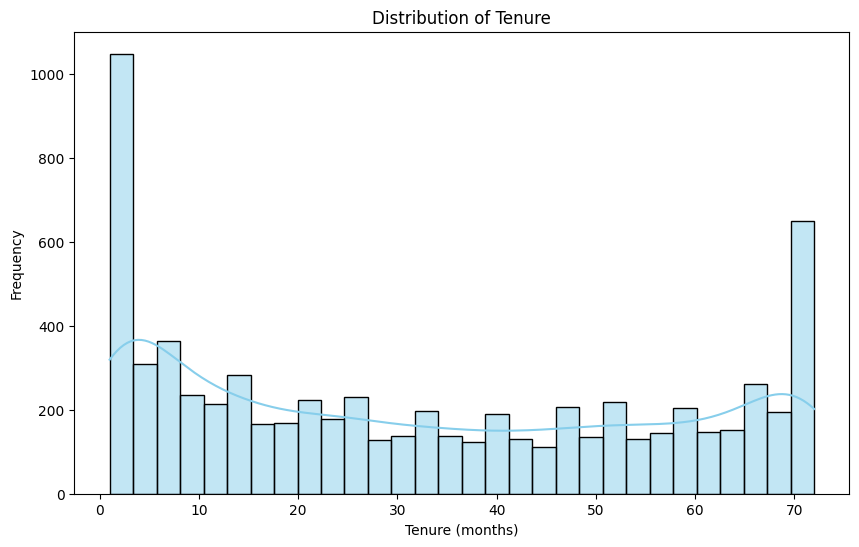

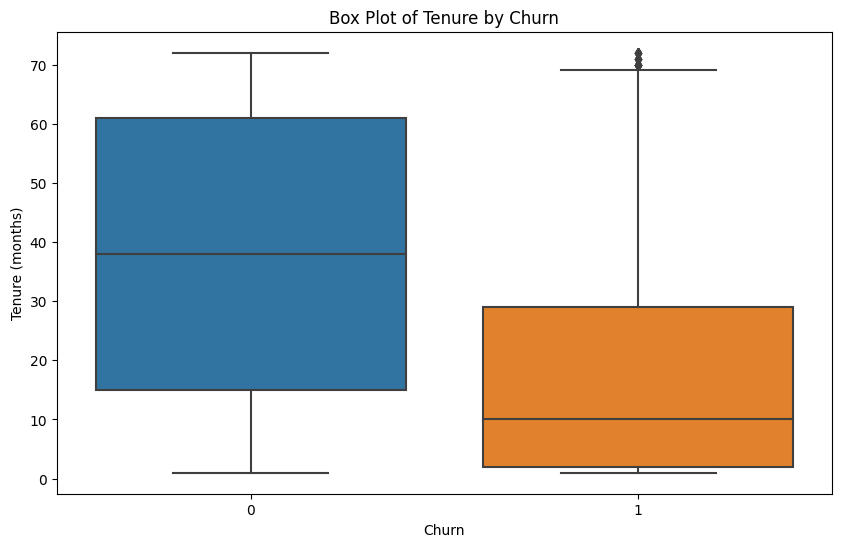

In [4]:
# TENURE

plt.figure(figsize=(10, 6))
sns.histplot(data['Tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=data)
plt.title('Box Plot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()


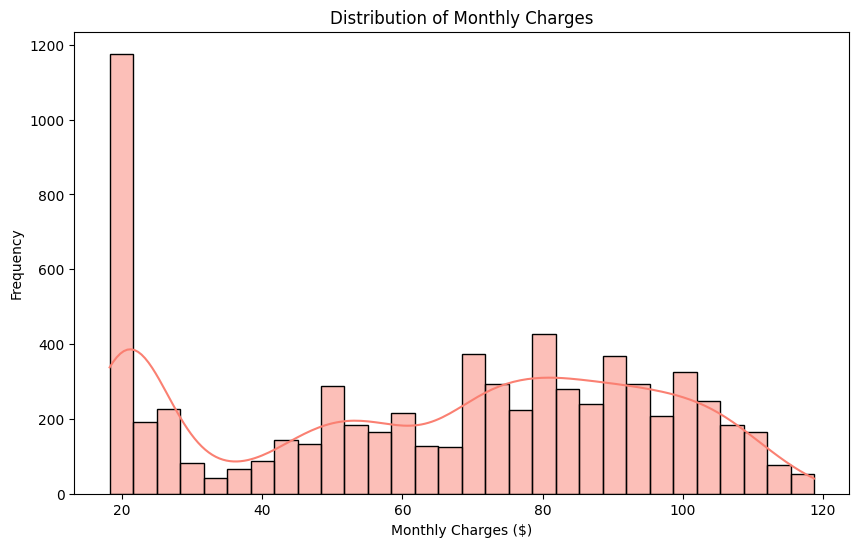

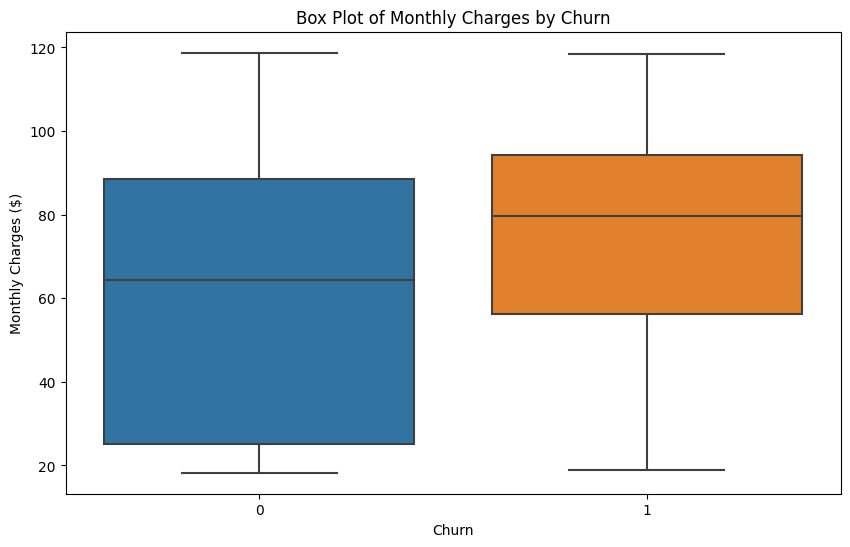

In [5]:
# MONTHLYCHARGES
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyCharges'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Box Plot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()

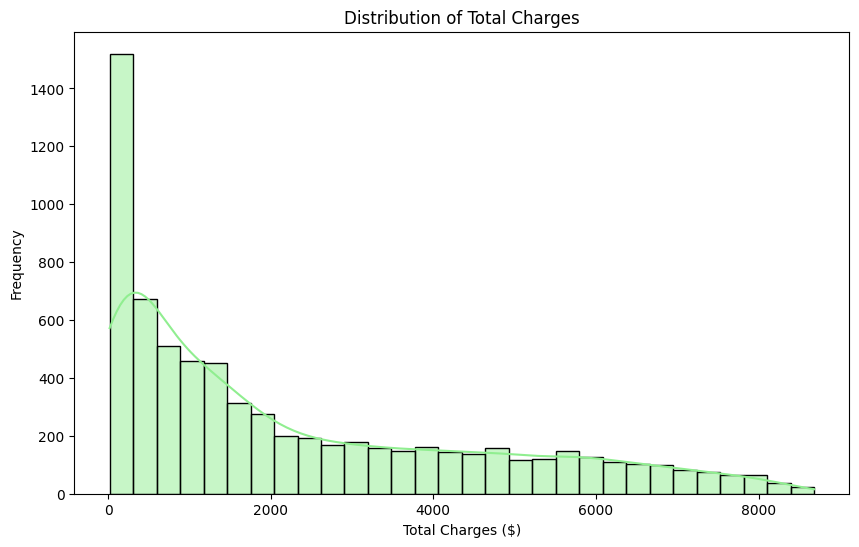

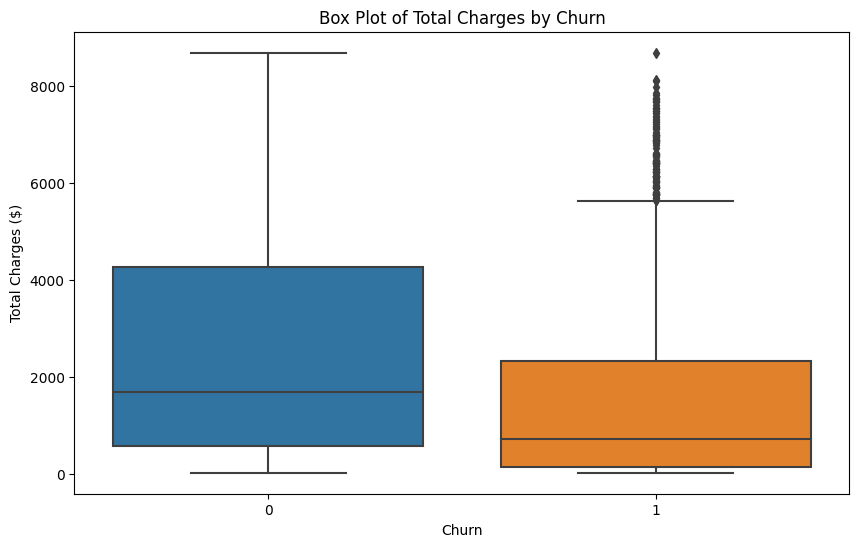

In [6]:
# TOTAL CHARGES
# Handle missing values in TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data['TotalCharges'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=data)
plt.title('Box Plot of Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges ($)')
plt.show()

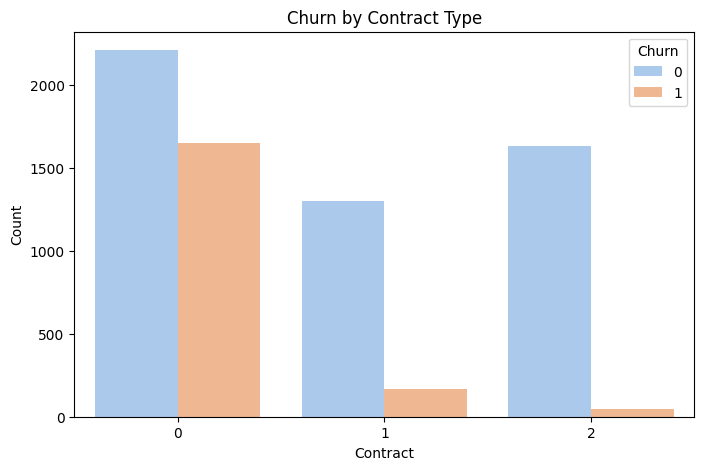

In [7]:
# ANALYZE RELATIONSHIP BETWEEN CATEGORICAL VARIABLES AND CHURN
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=data, palette='pastel')
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

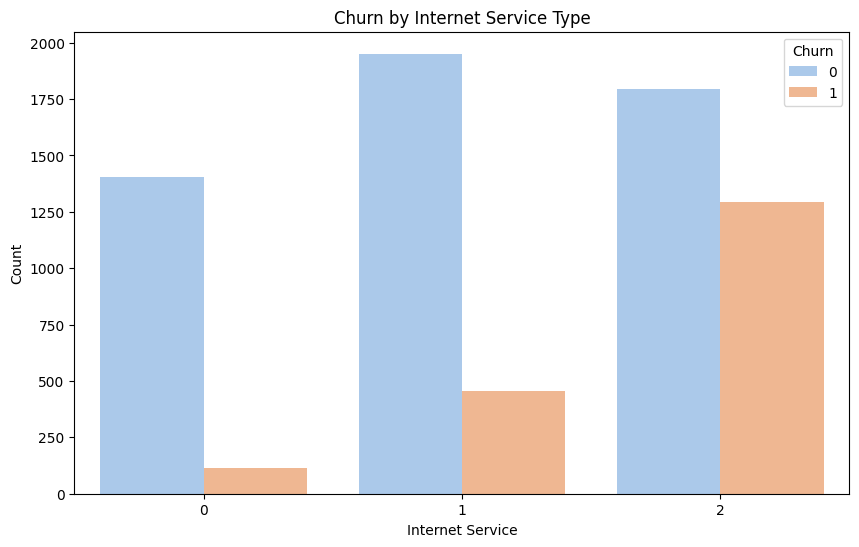

In [8]:
# ANALYZE RELATIONSHIP BETWEEN CATEGORICAL VARIABLES AND CHURN
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=data, palette='pastel')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

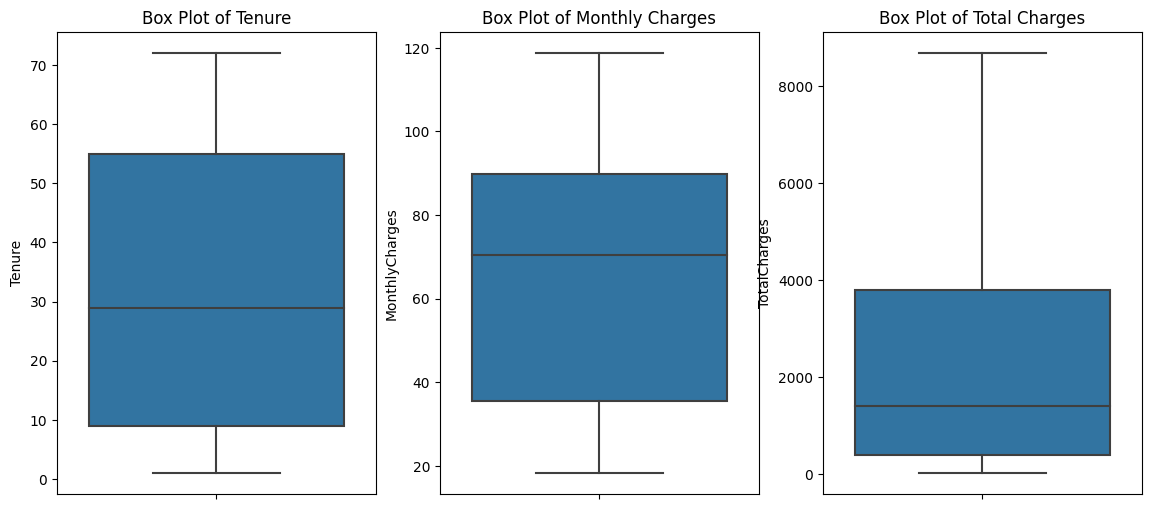

In [9]:
# IDENTIFY OUTLIERS OR ANOMALIES
# OUTLIERS IN TENURE, TOTALCHARGES AND MONTHLYCHRGES
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y='Tenure', data=data)
plt.title('Box Plot of Tenure')

plt.subplot(1, 3, 2)
sns.boxplot(y='MonthlyCharges', data=data)
plt.title('Box Plot of Monthly Charges')

plt.subplot(1, 3, 3)
sns.boxplot(y='TotalCharges', data=data)
plt.title('Box Plot of Total Charges')

plt.show()

In [10]:
# Handling Outliers and Anomalies
# You can choose to handle outliers by capping, flooring, or removing them.
    
# Capping outliers in Monthly Charges at the 99th percentile
upper_limit = data['MonthlyCharges'].quantile(0.99)
data['MonthlyCharges'] = np.where(data['MonthlyCharges'] > upper_limit, upper_limit, data['MonthlyCharges'])

# Capping outliers in Total Charges at the 99th percentile
upper_limit = data['TotalCharges'].quantile(0.99)
data['TotalCharges'] = np.where(data['TotalCharges'] > upper_limit, upper_limit, data['TotalCharges'])